In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [15]:
dataset_path = '/content/drive/MyDrive/hack_a_ton/knijki_data'

images_paths = []
for image_path in sorted(list(os.listdir(dataset_path))):
  images_paths.append(os.path.join(dataset_path, image_path))

knijka_example = cv2.imread(images_paths[-10])

print(len(images_paths))

134


In [16]:
def  set_image_size (image, w_set = None, h_set = None, int_set= cv2.INTER_LINEAR):
    dimension = None
    (h_img, w_img) = image.shape[:2]
    if w_set is None and h_set is None:
        return image
    else:
        dw = w_set / float(w_img)
        dimension = (w_set, int(h_img * dw))
    result = cv2.resize(image, dimension, interpolation = int_set)
    return result

In [17]:
def show_image (image, axis = False, size = (12, 12)):
    plt.figure(figsize = size)
    if not axis: plt.axis('off')
    if len(image.shape) == 3:
        plt.imshow(image[:, :, ::-1])
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

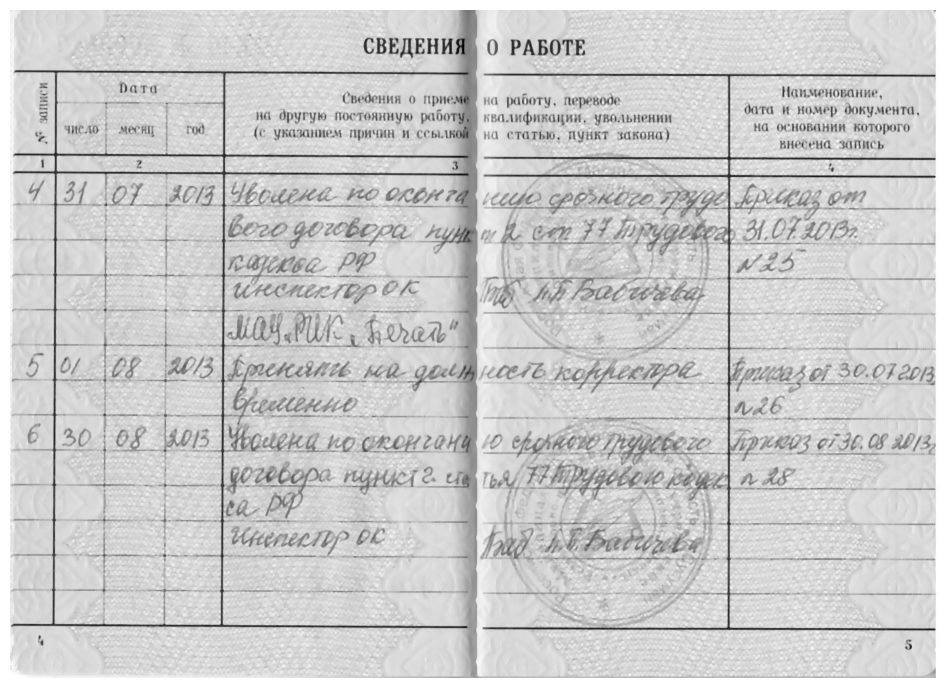

In [18]:
src = cv2.imread(images_paths[15])

gray_img = cv2.cvtColor(src.copy(), cv2.COLOR_BGR2GRAY)

blurred_gray_img = cv2.bilateralFilter(gray_img.copy(), 15, 10, 10)

#thresh = cv2.threshold(gray_img, 25, 155, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

gray_final = cv2.medianBlur(blurred_gray_img, 5)


show_image(gray_final)

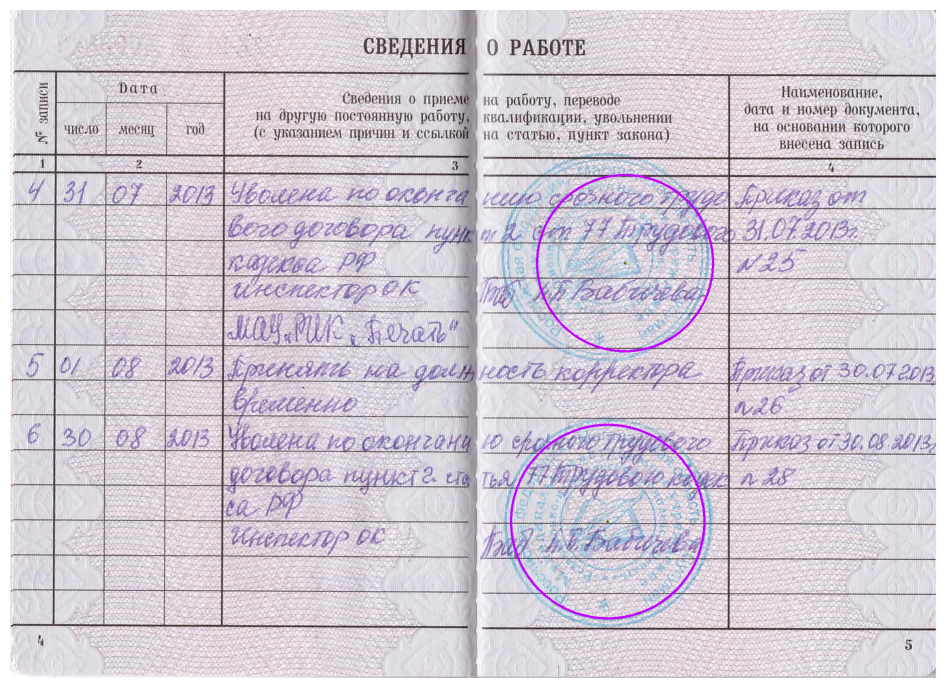

In [19]:
img_rows = gray_final.shape[0]

cropped_circles = []
src_copy = src.copy()
#функция преобразования Хафа
imgcircles = cv2.HoughCircles(gray_final, cv2.HOUGH_GRADIENT, 1, img_rows/8, param1=100, param2=85, minRadius=150, maxRadius=300)
if imgcircles is not None:
        imgcircles = np.uint16(np.around(imgcircles))
        for i in imgcircles[0, :]:
            center = (i[0], i[1])
            cv2.circle(src_copy, center, 1, (0, 100, 100), 3)
            radius = i[2]
	          #отрисовываем найденную окружность
            cv2.circle(src_copy, center, radius, (255, 0, 191), 3)

show_image(src_copy)

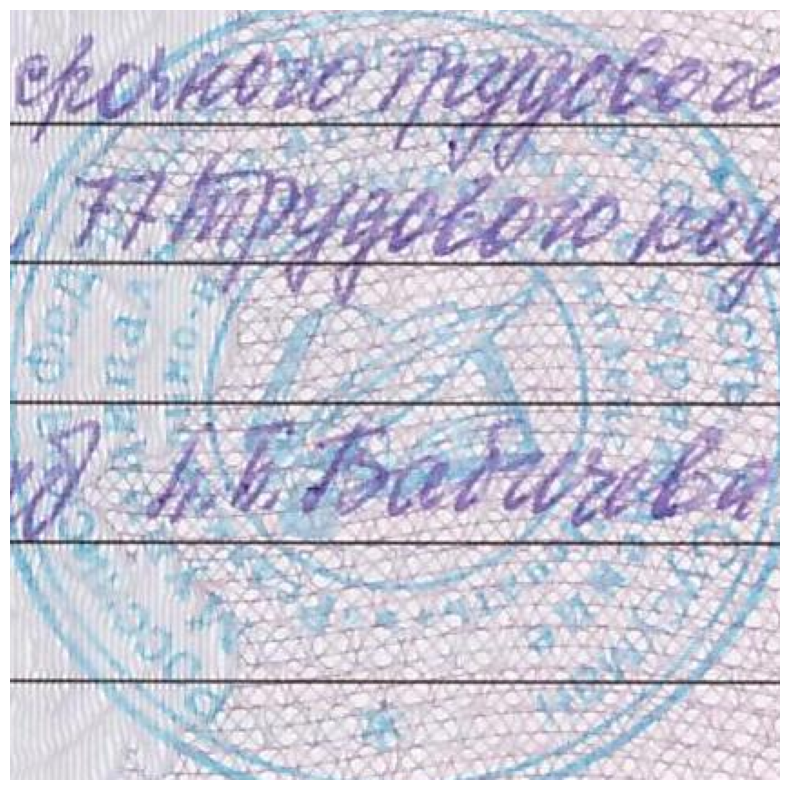

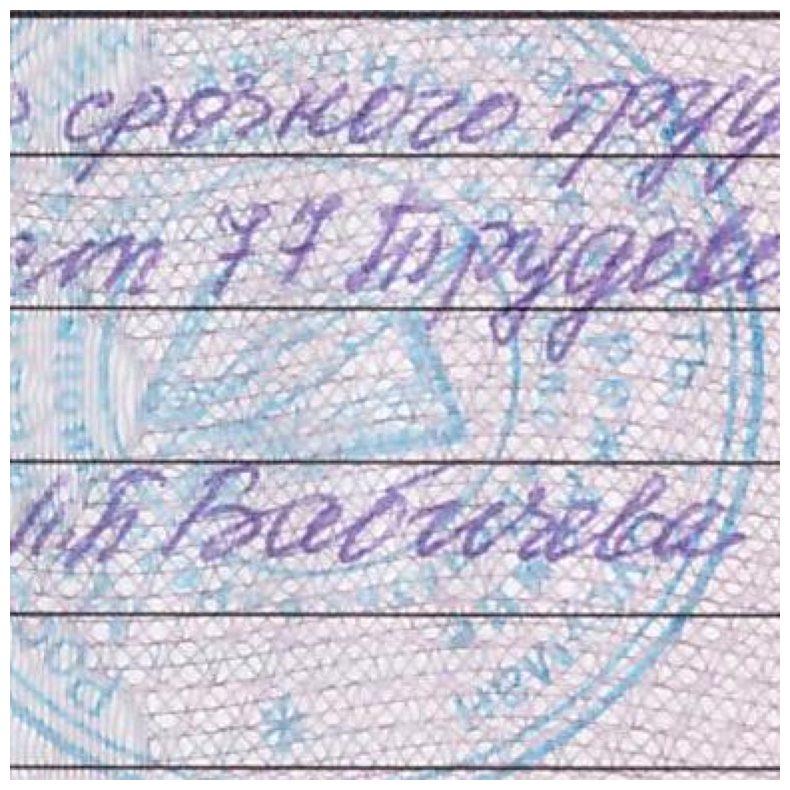

In [20]:
cropped_circles = []

if imgcircles is not None:
        imgcircles = np.uint16(np.around(imgcircles))
        for i in imgcircles[0, :]:
            x, y = i[0], i[1]
            r = i[2]
            cropped_image = src[int(y-r):int(y+r), int(x-r):int(x+r)]
            cropped_circles.append(cropped_image)

for image in cropped_circles:
  show_image(image, size=(10,10))